<a href="https://colab.research.google.com/github/SowjanyaKiran/Regression-with-Artificial-Neural-Networks-ANN-/blob/main/Regression_with_Artificial_Neural_Networks_Employee_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necssary libraries
import pandas as pd  # dataset handling (CSV, Excel, tables)
import numpy as np  # numerical operations, arrays
import matplotlib.pyplot as plt  # basic plotting
import seaborn as sns   # advanced, prettier plots
import warnings  # warning handlings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #splits dataset into training/testing.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder # normalizes numerical values for ANN , converts categorical variables into numbers ,
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score , accuracy_score , confusion_matrix , classification_report #for evaluating regression performance.

import tensorflow as tf #
from tensorflow.keras.models import Sequential #Sequential means the model is a linear stack of layers — one layer after another. It’s best when your network flows in a straight line from input → hidden layers → output, without multiple inputs/outputs or layer branches.
from tensorflow.keras.layers import Dense , Dropout #fully connected ANN layers ,prevents overfitting.
from tensorflow.keras.callbacks import EarlyStopping #stops training when validation loss stops improving.

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/Employers_data.csv')
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [ ]:
df.tail()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000
9999,10000,Joan Sorensen,25,Female,Sales,Analyst,4,Bachelor,San Francisco,70000


In [ ]:
#Checking the data type
df.dtypes

,0
Employee_ID,int64
Name,object
Age,int64
Gender,object
Department,object
Job_Title,object
Experience_Years,int64
Education_Level,object
Location,object
Salary,int64


In [ ]:
#Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
#Checking for NULL values
df.isnull().sum().any()

np.False_

In [ ]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [ ]:
# Identify input features (X) and target (y)
target = "Salary"
X = df.drop(columns=["Location", "Salary", "Name", "Employee_ID"])
y = df[target]

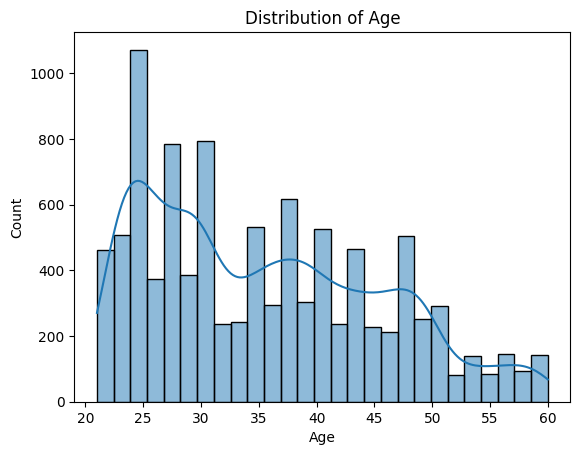

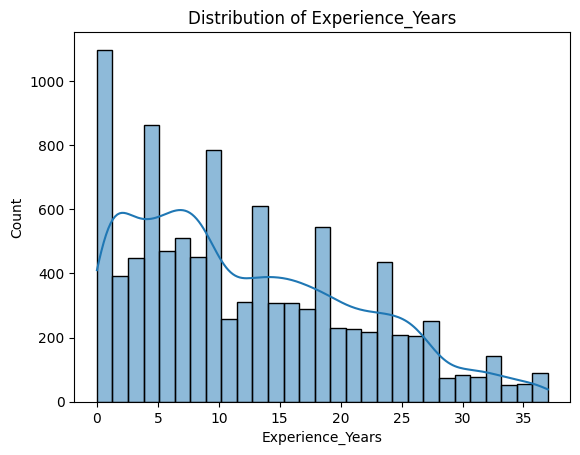

In [ ]:
#Distribution plot
for col in X.select_dtypes(include=["int64", "float64"]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

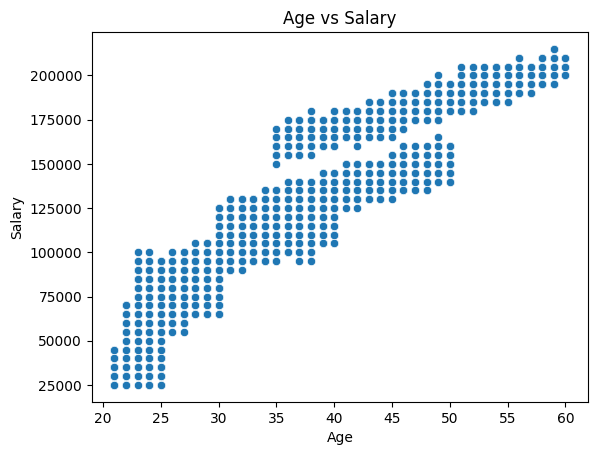

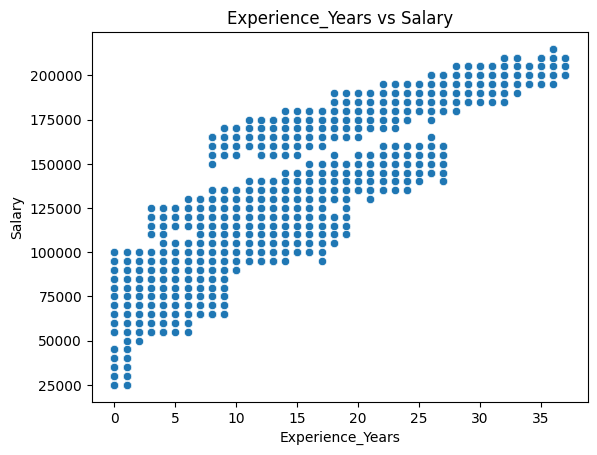

In [ ]:
# Relationship between features and target
for col in X.select_dtypes(include=["int64", "float64"]).columns:
    sns.scatterplot(x=df[col], y=y)
    plt.title(f"{col} vs {target}")
    plt.show()

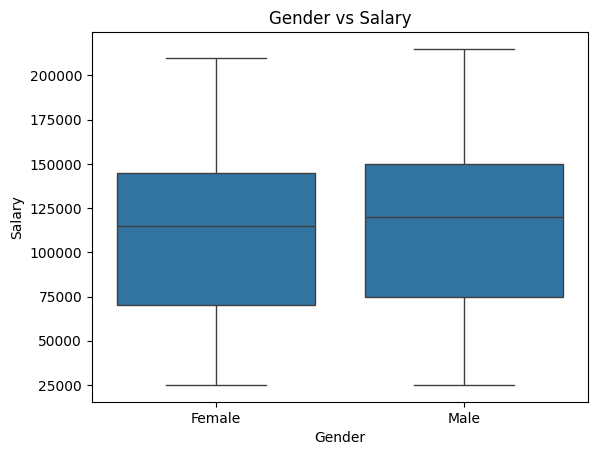

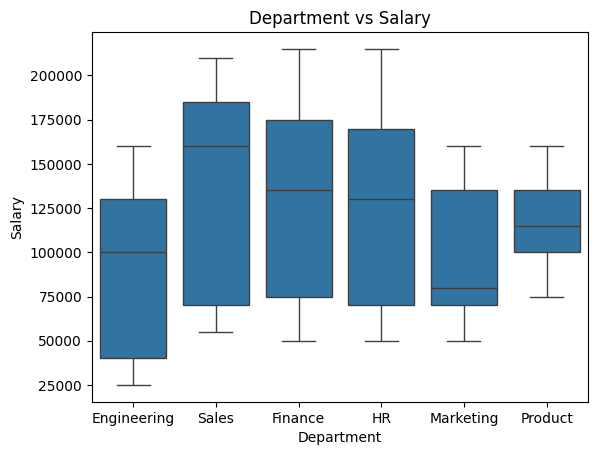

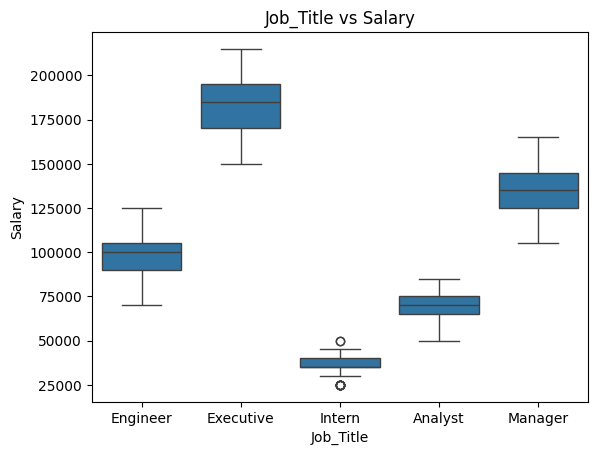

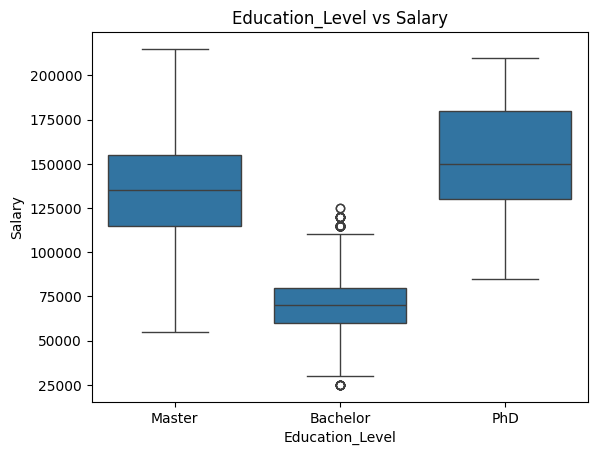

In [ ]:
# Compare categorical features
for col in X.select_dtypes(include=["object"]).columns:
    sns.boxplot(x=df[col], y=y)
    plt.title(f"{col} vs {target}")
    plt.show()

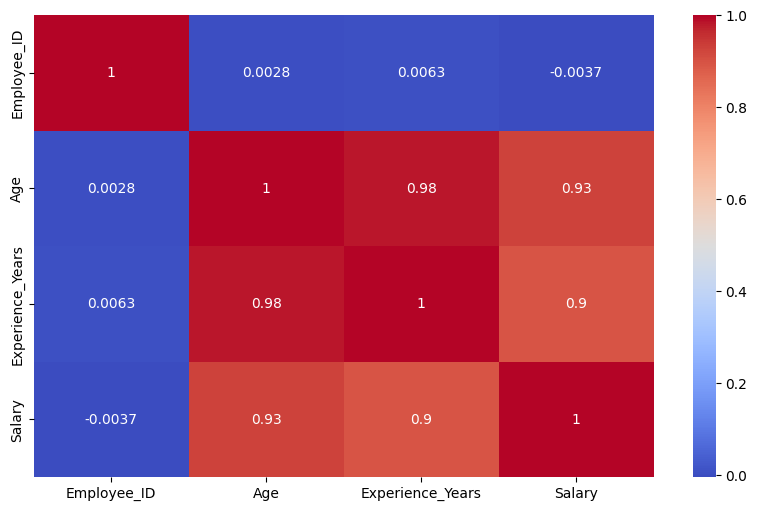

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Name']).corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Split features & target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Build ANN
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)   # regression output
])

In [ ]:
# Compile
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [ ]:
# Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15573277696.0000 - mae: 115695.3125 - val_loss: 15037549568.0000 - val_mae: 114002.7266
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15596283904.0000 - mae: 115925.7266 - val_loss: 14843136000.0000 - val_mae: 113336.7500
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14919590912.0000 - mae: 113334.8750 - val_loss: 14303862784.0000 - val_mae: 111478.7734
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14391822336.0000 - mae: 111785.7812 - val_loss: 13337372672.0000 - val_mae: 108040.7031
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13505913856.0000 - mae: 108823.9766 - val_loss: 11944072192.0000 - val_mae: 102793.2109
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11827630080.0000 - mae: 102391.0156 - val_loss: 10212672512.0000 - val_mae: 95676.9375
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10011798528.0000 - mae: 94745.5625 - val_loss:

In [ ]:
# Improved ANN
opt_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1)
])

opt_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss="mse", metrics=["mae"])

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history_opt = opt_model.fit(X_train, y_train, validation_split=0.2,
                            epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15504865280.0000 - mae: 115470.0938 - val_loss: 13611511808.0000 - val_mae: 108679.2578
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11055831040.0000 - mae: 96752.5391 - val_loss: 1967260416.0000 - val_mae: 37604.5625
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1762224000.0000 - mae: 34727.4141 - val_loss: 1004080320.0000 - val_mae: 24930.7148
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1127883776.0000 - mae: 26516.3164 - val_loss: 759668928.0000 - val_mae: 21775.6797
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 914901248.0000 - mae: 23803.3984 - val_loss: 588982272.0000 - val_mae: 19251.0352
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 764505536.0000 - mae: 21873.7109 - val_loss: 472440064.0000 - val_mae: 17199.8320
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 633700480.0000 - mae: 19863.0547 - val_loss: 394813280.0000 - val_mae

In [ ]:
# Predictions
y_pred = opt_model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 186181248.0
MAE: 10576.1689453125
R²: 0.9116645455360413


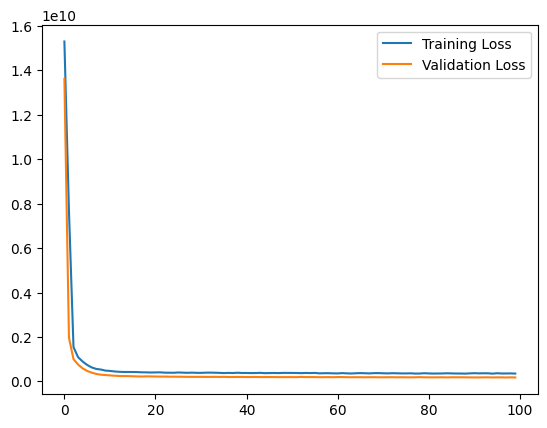

In [ ]:
# Loss curves
plt.plot(history_opt.history["loss"], label="Training Loss")
plt.plot(history_opt.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

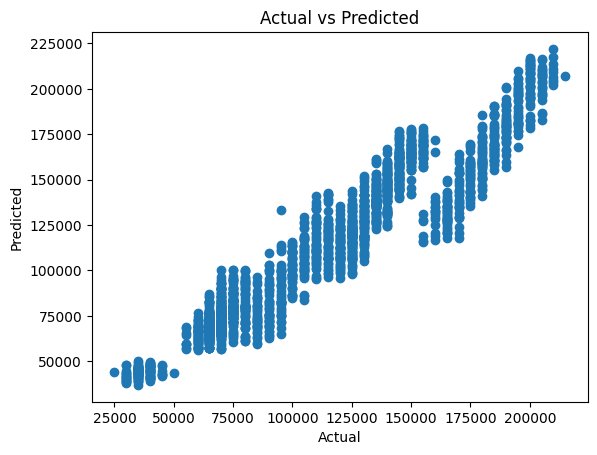

In [ ]:
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Baseline Linear Regression R²:", r2_score(y_test, y_pred))


Baseline Linear Regression R²: 0.897417741854856
